## Bert Details

#### How Bert is Used in Text Classification 
We will use the pre-trained BERT transformer model and then fine-tune it on propoganda detection. The main benefit of using a Transformer model is that the learning is bi-directional.

<b>HuggingFace:</b> One of the best libraries for implementing transformers in python. You can install the library with *pip install transformers*. You will also need pytorch installed (pip install torch)

#### Pre Processing the Data 
To use a pre-trained BERT model the input data must be converted into the required input data format. From there the input data is sent to BERT to obtain the embeddings. Bert embeddings are trained with a classification task and a next sentence prediction task (to determine if a sentence naturally follows the previous one). 

<b>Classification Task</b> - requires single vector input representing the input sentence. Token [CLS] is chosen. This is what we will be using for our propaganda classification. 

<b>Next Sentence Prediction Task</b> - where we inform the model where the first sentence ends and the next begins. [SEP] is usd. If each input sample contains only one text input (for classifier) we add [SEP] at the end of the input text. 

<b>Padding Token</b>: 
BERT requires a fixed length of text per input. When we have sentences that are shorter than the maximum length, we have to add paddings (empty toknes) to the end of the sentence. Represented by [PAD]

<b>Converting Tokens to IDs</b>: 
BERT has given a unique ID to each token. We need to convert each token in the input sentence into its corresponding unique BERT ID. 

<b>Note on Vocabulary</b>: Since BERT is a pre-trained model that was trained on a particular corpus, the vocabulary is fixed. Therefore it is possible that some of the words in our data are OOV. We should replace these okens with a special token [UNK] which stansd for the unknown token. BERT also makes use a of WordPiece algoirithm that breaks a word into several subwords. This reduces the number of [UNK] tokens. Without applying the tokenization function of BERT before converting tokens to ids, OOV words will not be split into subwords. 

<b>Key Steps:</b>
1. Applying tokenizer: BertTokenizer.from_pretrained("bert-base-cased").tokenize 
2. Adding the [CLS] token at the beginning of the sentence 
3. Adding the [SEP] token at the end of the sentence 
4. Padding he setence with [PAD] tokens so that the total length equals to the maximum leength 
4. Converting each token to its corresponding BERT ID using t.convert_tokens_to_ids(tokens)

<b>Using Transformers Package:</b>
The function encode_plus does all of the above steps at once. Ie. adds the [CLS] & [SEP], sets max length, adds [PADS] and generates an attention mask & IDs in tensor format. The attention mask tells the model which of the tokens are [PAD] tokens and should not be added. Needed for BERT.

Q - what is different about tensor format?

<b>Distilled BERT:</b>
Smaller & Faster version of BERT that retains 95% of BERT performances while only using 60% of the bert-based-uncased parameters. 

<b>Hyperparameters:</b> 
1. Model Type - bert-based-cased
2. Max number of tokens - 60 
3. Batch size - 64 
4. Optimizer - AdamW 
5. Learning Rate - 5e-5
6. Epochs - 5 
7. Loss criterion - nn.BCELoss(), used 
8. Gradient Norm Clipper - yes (used to prevent to exploding gradient problem)

<b> Conclusions: </b> 
1. Using the loss criterion lowers the validation loss but increases the training loss - brings the values closer together
2. It is a sign of overfitting when the validation starts to increase while the training loss continues to decrease. In this case we should use the model with the lowest validation loss. 


#### Pre Processing the Data 
To use a pre-trained BERT model the input data must be converted into the required input data format. From there the input data is sent to BERT to obtain the embeddings. Bert embeddings are trained with a classification task and a next sentence prediction task (to determine if a sentence naturally follows the previous one). 

<b>Classification Task</b> - requires single vector input representing the input sentence. Token [CLS] is chosen. This is what we will be using for our propaganda classification. 

<b>Next Sentence Prediction Task</b> - where we inform the model where the first sentence ends and the next begins. [SEP] is usd. If each input sample contains only one text input (for classifier) we add [SEP] at the end of the input text. 

<b>Padding Token</b>: 
BERT requires a fixed length of text per input. When we have sentences that are shorter than the maximum length, we have to add paddings (empty toknes) to the end of the sentence. Represented by [PAD]

<b>Converting Tokens to IDs</b>: 
BERT has given a unique ID to each token. We need to convert each token in the input sentence into its corresponding unique BERT ID. 

<b>Note on Vocabulary</b>: Since BERT is a pre-trained model that was trained on a particular corpus, the vocabulary is fixed. Therefore it is possible that some of the words in our data are OOV. We should replace these okens with a special token [UNK] which stansd for the unknown token. BERT also makes use a of WordPiece algoirithm that breaks a word into several subwords. This reduces the number of [UNK] tokens. Without applying the tokenization function of BERT before converting tokens to ids, OOV words will not be split into subwords. 

<b>Key Steps:</b>
1. Applying tokenizer: BertTokenizer.from_pretrained("bert-base-cased").tokenize 
2. Adding the [CLS] token at the beginning of the sentence 
3. Adding the [SEP] token at the end of the sentence 
4. Padding he setence with [PAD] tokens so that the total length equals to the maximum leength 
4. Converting each token to its corresponding BERT ID using t.convert_tokens_to_ids(tokens)

<b>Using Transformers Package:</b>
The function encode_plus does all of the above steps at once. Ie. adds the [CLS] & [SEP], sets max length, adds [PADS] and generates an attention mask & IDs in tensor format. The attention mask tells the model which of the tokens are [PAD] tokens and should not be added. Needed for BERT.

Q - what is different about tensor format?

<b>Distilled BERT:</b>
Smaller & Faster version of BERT that retains 95% of BERT performances while only using 60% of the bert-based-uncased parameters. 

<b>Hyperparameters:</b> 
1. Model Type - bert-based-cased
2. Max number of tokens - 60 
3. Batch size - 64 
4. Optimizer - AdamW 
5. Learning Rate - 5e-5
6. Epochs - 5 
7. Loss criterion - nn.BCELoss(), used 
8. Gradient Norm Clipper - yes (used to prevent to exploding gradient problem)

<b> Conclusions: </b> 
1. Using the loss criterion lowers the validation loss but increases the training loss - brings the values closer together
2. It is a sign of overfitting when the validation starts to increase while the training loss continues to decrease. In this case we should use the model with the lowest validation loss. 


### Step 0: Import Libraries

In [21]:
!pip install transformers
import pandas as pd 
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertModel, AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


### Step 1: Import Data

In [22]:
#Reading in propoganda data 
dataset = pd.read_csv('cleaned_propaganda_data.csv', sep = '|', header = None, names = ["Text", "Label"])

### Step 2: Split Data into Training, Test & Validation Set

In [23]:
# split the Dataset into train (64%) , validation (16%) and test sets(20%)
def split_datasets(dataset):
    trainval, test_data, trainval_labels, test_labels = train_test_split(dataset['Text'], dataset['Label'], 
                                                                    random_state=0, 
                                                                    test_size=0.2, 
                                                                    stratify=dataset['Label'])
    
    train_data, validation_data, train_labels, validation_labels = train_test_split(trainval, trainval_labels, 
                                                                random_state=0, 
                                                                test_size=0.2, 
                                                                stratify=trainval_labels)
    return train_data,validation_data,test_data,train_labels,validation_labels,test_labels

train_data,validation_data,test_data,train_labels,validation_labels,test_labels= split_datasets(dataset)

### Step 3: Tokenize each Dataset to use as Input for BERT

In [24]:
#Encode each input of text as a unique BERT ID and include CLS, SEP & PAD tokens 
def bert_tokenizer(train_data, validation_data, test_data):
    train_tokens = tokenizer.batch_encode_plus(
        train_data.tolist(),  # the sentence to be encoded
        add_special_tokens=True,  # Add [CLS] and [SEP]
        truncation=True, #truncates sentences longer than max length 
        max_length = 60,  # maximum length of a sentence -> need to decide what we want this to be 
        padding=True,  # Add [PAD]s
        return_attention_mask = True,  # Generate the attention mask
        return_tensors = 'pt',  # ask the function to return PyTorch tensors
    )

    #Validation set encoding 
    validation_tokens = tokenizer.batch_encode_plus(
        validation_data.tolist(),  # the sentence to be encoded
        add_special_tokens=True,  # Add [CLS] and [SEP]
        truncation=True, #truncates sentences longer than max length 
        max_length = 60,  # maximum length of a sentence -> need to decide what we want this to be 
        padding=True,  # Add [PAD]s
        return_attention_mask = True,  # Generate the attention mask
        return_tensors = 'pt',  # ask the function to return PyTorch tensors
    )

    #Test set encoding
    test_tokens = tokenizer.batch_encode_plus(
        test_data.tolist(),  # the sentence to be encoded
        add_special_tokens=True,  # Add [CLS] and [SEP]
        truncation=True, #truncates sentences longer than max length 
        max_length = 60,  # maximum length of a sentence -> need to decide what we want this to be 
        padding=True,  # Add [PAD]s
        return_attention_mask = True,  # Generate the attention mask
        return_tensors = 'pt',  # ask the function to return PyTorch tensors
    )
    
    return train_tokens, validation_tokens, test_tokens


def create_tensor_datasets(train_tokens, train_labels, validation_tokens, validation_labels, test_tokens, test_labels):
    with torch.no_grad():
        #Get input_ids, attention_mask, token_type_ids for each dataset & convert labels to tensors
        train_ids = train_tokens['input_ids']
        train_mask = train_tokens['attention_mask']
        train_tt_ids = train_tokens['token_type_ids']
        train_y = torch.tensor(train_labels.tolist())

        val_ids = validation_tokens['input_ids']
        val_mask = validation_tokens['attention_mask']
        val_tt_ids = validation_tokens['token_type_ids']
        val_y = torch.tensor(validation_labels.tolist())

        test_ids = test_tokens['input_ids']
        test_mask = test_tokens['attention_mask']
        test_tt_ids = test_tokens['token_type_ids']
        test_y = torch.tensor(test_labels.tolist())

    #Create a tensor dataset for each of the train,test & validation sets 
    train_tensor_dataset = TensorDataset(train_ids, train_mask, train_tt_ids, train_y) #wrap all tensor data for training
    validation_tensor_dataset = TensorDataset(val_ids, val_mask, val_tt_ids, val_y)
    test_tensor_dataset = TensorDataset(test_ids, test_mask, test_tt_ids, test_y)
    
    return train_tensor_dataset, validation_tensor_dataset, test_tensor_dataset

#Function to create the DataLoaders that load the data in batches 
def data_loader(train_data, validation_data,test_data, batch_size): 
    
    train_sample = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sample, batch_size=batch_size)
    
    validation_sample = SequentialSampler(validation_data)
    validation_dataloader = DataLoader(validation_data, sampler=validation_sample, batch_size=batch_size)
    
    test_sample = SequentialSampler(test_data)
    test_dataloader = DataLoader(test_data, sampler=test_sample, batch_size=batch_size)

    return train_dataloader, validation_dataloader, test_dataloader

#Step 1: Define the tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

#Step 2: Tokenize each dataset 
train_tokens, validation_tokens, test_tokens = bert_tokenizer(train_data, validation_data, test_data)

#Step 3: Create tensor datasets
train_tensor_dataset, validation_tensor_dataset, test_tensor_dataset = create_tensor_datasets(train_tokens, train_labels, validation_tokens, validation_labels, test_tokens, test_labels)

#Step 4: Create dataloaders for each tensor dataset
batch_size = 64
train_dataloader, validation_dataloader, test_dataloader = data_loader(train_tensor_dataset,validation_tensor_dataset, test_tensor_dataset, batch_size)

### Step 4: Build BertForSequenceClassification Model

In [25]:
#Define Model 
def define_model(learning_rate): 
    bertmodel = BertForSequenceClassification.from_pretrained('bert-base-cased')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = bertmodel.to(device) 

    #Define Optimizer - using AdamW 
    optimizer = AdamW(model.parameters(), lr = learning_rate)
    return model, optimizer, device
learning_rate = 2e-5
model, optimizer,device = define_model(learning_rate)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

### Step 5: Training the Model

### Step 5: Training the Model

Initially: Define number of epoachs & steps per validation & put model into training mode

For each epoch: 
1. Enumerate through the training dataset dataloader (each batch of data)  
2. For each batch: 
  - push batch to GPU to get the datafields (ids, mask, token_type_ids, labels) 
  - perform a forward pass of the model to get the output 
  - get the loss from the ouptut 
  - remove previous calculated gradients (optimizer.zero_grad())
  - perform backwards pass of model to calculate new gradients 
  - clip gradients to prevent the exploding gradient problem (potential to remove step)
  - update parameters in optimizer 
  - add loss to the running loss 
3. At the end of each epoch evaluate the current model on the validation set 
  - will return the validation accuracy & loss



In [26]:
def train_Bert(model, optimizer, train_loader, val_loader): 
    
    num_epochs = 5
    
    #initialize values 
    running_training_loss = 0.0
    total_steps = 0
    training_loss_list = []
    validation_loss_list = []
    validation_accuracy_list = []
    total_steps_list = []
    models_built = []
    #criterion = nn.BCELoss();
    
    
    for epoch in range(num_epochs): #for each epoch
        model.train() #put model in training mode 

        for step, batch in enumerate(train_loader): # iterate over batches
        
            if step % 100 == 0 and not step == 0:# progress update after every 50 batches.
                print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_loader)))

            data_ids, mask, tt_ids, labels  = [r.to(device) for r in batch] # push the batch to gpu      

            #perform foward pass 
            output = model(input_ids= data_ids, attention_mask= mask,token_type_ids = tt_ids, labels = labels) # get model predictions for the current batch
            loss = output.loss
            
            optimizer.zero_grad() #remove any previously calculated gradients 
            loss.backward() # perform backward pass to calculate the gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"

            optimizer.step() # update parameters
            
            # update running values
            running_training_loss += loss.item()
            total_steps += 1

        #Calculate average training loss over the entire dataset for this epoach
        average_training_loss = running_training_loss /len(train_loader)
        running_training_loss = 0.0

        #Measure the performance of the model on the validation dataset after each training epoch 
        validation_loss, validation_accuracy = evaluate_val(model, val_loader)

        training_loss_list.append(average_training_loss)
        validation_loss_list.append(validation_loss)
        validation_accuracy_list.append(validation_accuracy)
        total_steps_list.append(total_steps)
        models_built.append(model)

        print('Epoch [{}/{}], Training Loss: {:.4f}, Valid Loss: {:.4f}, Validation Accuracy: {:.4f}'
                      .format(epoch+1,num_epochs, average_training_loss, validation_loss, validation_accuracy))

    print('Finished Training!')
    model_metrics = {'training_loss_values': training_loss_list, 'validation_loss_values': validation_loss_list,
                     'validation_accuracy_values': validation_accuracy_list, 'total_steps_values': total_steps_list,
                     'models_built': models_built}
    return model, model_metrics

def evaluate_val(model, val_loader): 
    model.eval() #put the model into evaluation mode (disables dropout layers)
    print("evaluation")

    #Accuracy & Loss Variables (will be updated in batches)
    validation_running_loss = 0.0
    predicted_values = []
    true_values = []

    with torch.no_grad():                   
        for step, batch in enumerate(val_loader):# validation loop
            data_ids, mask, tt_ids, labels  = [r.to(device) for r in batch]
            output = model(input_ids= data_ids, attention_mask= mask,token_type_ids = tt_ids, labels = labels) # get model predictions for the current batch
            loss = output.loss
            logits = output.logits

            predicted_values.extend(torch.argmax(logits ,dim=1).tolist())
            true_values.extend(labels.tolist())
            
            #Update running loss
            validation_running_loss += loss.item()
    
    #Calculate total loss & accuracy 
    validation_accuracy = accuracy_score(true_values, predicted_values)
    validation_loss = validation_running_loss/len(val_loader)

    return validation_loss, validation_accuracy

model, model_metrics = train_Bert(model, optimizer, train_dataloader, validation_dataloader)

  Batch   100  of  1,551.
  Batch   200  of  1,551.
  Batch   300  of  1,551.
  Batch   400  of  1,551.
  Batch   500  of  1,551.
  Batch   600  of  1,551.
  Batch   700  of  1,551.
  Batch   800  of  1,551.
  Batch   900  of  1,551.
  Batch 1,000  of  1,551.
  Batch 1,100  of  1,551.
  Batch 1,200  of  1,551.
  Batch 1,300  of  1,551.
  Batch 1,400  of  1,551.
  Batch 1,500  of  1,551.
evaluation
Epoch [1/5], Training Loss: 0.2973, Valid Loss: 0.2505, Validation Accuracy: 0.8974
  Batch   100  of  1,551.
  Batch   200  of  1,551.
  Batch   300  of  1,551.
  Batch   400  of  1,551.
  Batch   500  of  1,551.
  Batch   600  of  1,551.
  Batch   700  of  1,551.
  Batch   800  of  1,551.
  Batch   900  of  1,551.
  Batch 1,000  of  1,551.
  Batch 1,100  of  1,551.
  Batch 1,200  of  1,551.
  Batch 1,300  of  1,551.
  Batch 1,400  of  1,551.
  Batch 1,500  of  1,551.
evaluation
Epoch [2/5], Training Loss: 0.2018, Valid Loss: 0.2401, Validation Accuracy: 0.9059
  Batch   100  of  1,551.
  Ba

### Step 6: Evaluate Results

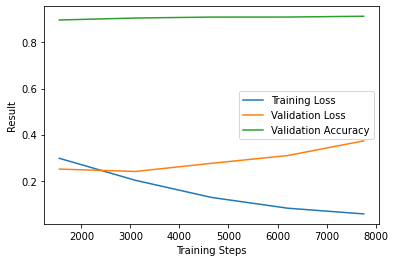

Validation Accuracy:
epoch 1: 0.8974
epoch 2: 0.9059
epoch 3: 0.9101
epoch 4: 0.9102
epoch 5: 0.9137
Classification Report:
              precision    recall  f1-score   support

           1     0.9126    0.9068    0.9097     15577
           0     0.9066    0.9124    0.9095     15439

    accuracy                         0.9096     31016
   macro avg     0.9096    0.9096    0.9096     31016
weighted avg     0.9096    0.9096    0.9096     31016



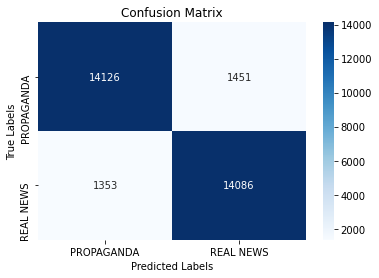

In [27]:
#Graph of validation loss vs. train loss 
def get_loss_graph(model_metrics):
    training_loss = model_metrics.get('training_loss_values')
    validation_loss = model_metrics.get('validation_loss_values')
    validation_accuracy = model_metrics.get('validation_accuracy_values')
    total_training_steps = model_metrics.get('total_steps_values')

    plt.plot(total_training_steps, training_loss, label='Training Loss')
    plt.plot(total_training_steps, validation_loss, label='Validation Loss')
    plt.plot(total_training_steps, validation_accuracy, label='Validation Accuracy')
    plt.xlabel('Training Steps')
    plt.ylabel('Result')
    plt.legend()
    plt.show() 
    
    epoch = 1; 
    print("Validation Accuracy:")
    for val in validation_accuracy: 
      print('epoch {}: {}'.format(epoch, round(val,4)))
      epoch += 1


# Evaluation of Model - Classification report & confusion matrix 
def evaluate_model(model, test_loader):
    predicted_values = []
    true_values = []

    model.eval()
    with torch.no_grad():
        for step, batch in enumerate(test_loader): # iterate over batches

            data_ids, mask, tt_ids, labels  = [r.to(device) for r in batch] # push the batch to gpu      

            output = model(input_ids= data_ids, attention_mask= mask,token_type_ids = tt_ids, labels = labels) # get model predictions for the current batch
            logits = output.logits
            predicted_values.extend(torch.argmax(logits,dim=1).tolist())
            true_values.extend(labels.tolist())

            
    
    print('Classification Report:')
    print(classification_report(true_values, predicted_values, labels=[1,0], digits=4))
    
    cm = confusion_matrix(true_values, predicted_values, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.xaxis.set_ticklabels(['PROPAGANDA', 'REAL NEWS'])
    ax.yaxis.set_ticklabels(['PROPAGANDA', 'REAL NEWS'])

#Step 1: Get graph of training loss vs. validation loss 
get_loss_graph(model_metrics)

#Step 2: Get model results in from of classification report & confusion matrix 
evaluate_model(model, test_dataloader)

#### Sources:
1. https://albertauyeung.github.io/2020/06/19/bert-tokenization.html

2. https://mlexplained.com/2018/02/08/a-comprehensive-tutorial-to-torchtext/

3. https://atheros.ai/blog/text-classification-with-transformers-in-tensorflow-2

4. https://medium.com/swlh/a-simple-guide-on-using-bert-for-text-classification-bbf041ac8d04

5. https://skimai.com/fine-tuning-bert-for-sentiment-analysis/

6. https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b

7. https://pytorch.org/tutorials/recipes/recipes/zeroing_out_gradients.html

